<a href="https://colab.research.google.com/github/gabrielluizone/Gradient-Descent/blob/main/GradDesc_Neo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

## <strong>Gradiente Descendente</strong>
> Parabola de um Conj. de Treinamento

Dado o conjunto de treinamento. Qual é a melhor parábola que aprova o conjunto de treinamento de modo a minimizar o erro?
$$[(1, 4), (-1, 5), (2, 7), (-2, 8), (3, 12), (-3, 13), (4, 19), (-4, 20)]$$
</div>

In [5]:
# Importações e Pré-Definições
import matplotlib.pyplot as plt 
from tqdm import tqdm # Barra de Carregamento
plt.style.use('ggplot')

# Dados de treinamento normalizados
X = [1, -1, 2, -2, 3, -3, 4, -4]
Y = [4, 5, 7, 8, 12, 13, 19, 20]

<div class="markdown-google-sans">

## <strong>Cálculo Direto</strong>
> Função direta, sem enrrolação
</div>

In [6]:
# Função direta do Gradiente Descendente
def GradDesc(w1, w2, b, lr):
  erro, i = 1, 0
  e = 6 # Elevado a 6, tipo um 10**-6
  with tqdm() as pbar:
    while round(erro, e) > round(1/3, e): # Quantas casas decimais de aproximação 0.333 ou 0.333333

      # Calculo do Erro
      erro = ((w1 * ( 1)**2 + w2 * ( 1) + b) -  4)**2 + (
              (w1 * (-1)**2 + w2 * (-1) + b) -  5)**2 + (
              (w1 * ( 2)**2 + w2 * ( 2) + b) -  7)**2 + (
              (w1 * (-2)**2 + w2 * (-2) + b) -  8)**2 + (
              (w1 * ( 3)**2 + w2 * ( 3) + b) - 12)**2 + (
              (w1 * (-3)**2 + w2 * (-3) + b) - 13)**2 + (
              (w1 * ( 4)**2 + w2 * ( 4) + b) - 19)**2 + (
              (w1 * (-4)**2 + w2 * (-4) + b) - 20)**2  

      dw1 = -2 * (                                               (
              ( 1)**2 * (4  - (w1 * ( 1)**2 + w2 * ( 1) + b))) + (
              (-1)**2 * (5  - (w1 * (-1)**2 + w2 * (-1) + b))) + (
              ( 2)**2 * (7  - (w1 * ( 2)**2 + w2 * ( 2) + b))) + (
              (-2)**2 * (8  - (w1 * (-2)**2 + w2 * (-2) + b))) + (
              ( 3)**2 * (12 - (w1 * ( 3)**2 + w2 * ( 3) + b))) + (
              (-3)**2 * (13 - (w1 * (-3)**2 + w2 * (-3) + b))) + (
              ( 4)**2 * (19 - (w1 * ( 4)**2 + w2 * ( 4) + b))) + (
              (-4)**2 * (20 - (w1 * (-4)**2 + w2 * (-4) + b)))   ) / 100
      
      dw2 = -2 * (                                            (
              ( 1) * (4 -  (w1 * ( 1)**2 + w2 * ( 1) + b))) + (
              (-1) * (5 -  (w1 * (-1)**2 + w2 * (-1) + b))) + (
              ( 2) * (7 -  (w1 * ( 2)**2 + w2 * ( 2) + b))) + (
              (-2) * (8 -  (w1 * (-2)**2 + w2 * (-2) + b))) + (
              ( 3) * (12 - (w1 * ( 3)**2 + w2 * ( 3) + b))) + (
              (-3) * (13 - (w1 * (-3)**2 + w2 * (-3) + b))) + (
              ( 4) * (19 - (w1 * ( 4)**2 + w2 * ( 4) + b))) + (
              (-4) * (20 - (w1 * (-4)**2 + w2 * (-4) + b)))   ) / 100

      db = -2 * (                                      (
              (4 -  (w1 * ( 1)**2 + w2 * ( 1) + b))) + (
              (5 -  (w1 * (-1)**2 + w2 * (-1) + b))) + (
              (7 -  (w1 * ( 2)**2 + w2 * ( 2) + b))) + (
              (8 -  (w1 * (-2)**2 + w2 * (-2) + b))) + (
              (12 - (w1 * ( 3)**2 + w2 * ( 3) + b))) + (
              (13 - (w1 * (-3)**2 + w2 * (-3) + b))) + (
              (19 - (w1 * ( 4)**2 + w2 * ( 4) + b))) + (
              (20 - (w1 * (-4)**2 + w2 * (-4) + b)))   ) / 100

      # Atualização dos Coeficientes
      w1 = w1 - lr * dw1
      w2 = w2 - lr * dw2
      b  = b  - lr * db
      i += 1

      # Barra de Progresso
      pbar.set_description(f'{i:5} | Error: {erro:.30f} | w1: {w1:.{e}f} | w2: {w2:.{e}f} | b: {b:.{e}f}')
      pbar.update(1)
      
  return w1, w2, b

In [11]:
w1, w2, b = GradDesc(2, 2, 2, 0.1)
print('\n\n• Coeficientes Otimizados')
print(f'w1 = {w1:.16f}')
print(f'w2 = {w2:.16f}')
print(f'b  = {b:.16f}')

 1516 | Error: 0.333333498869728350744168210440 | w1: 1.000020 | w2: -0.166667 | b: 3.499763: : 1516it [00:03, 419.83it/s]




• Coeficientes Otimizados
w1 = 1.0000201594133327
w2 = -0.1666666666666665
b  = 3.4997630914066944


<div class="markdown-google-sans">

### Outras Definições para o Gráfico
</div>

In [14]:
# Calcular o erro
def calcular_erro(w1, w2, b):
  return ((w1 * 1**2 + w2 * 1 + b) - 4)**2 + ((w1 * (-1)**2 + w2 * (-1) + b) - 5)**2 + ((w1 * 2**2 + w2 * 2 + b) - 7)**2 + ((w1 * (-2)**2 + w2 * (-2) + b) - 8)**2 + ((w1 * 3**2 + w2 * 3 + b) - 12)**2 + ((w1 * (-3)**2 + w2 * (-3) + b) - 13)**2 + ((w1 * 4**2 + w2 * 4 + b) - 19)**2 + ((w1 * (-4)**2 + w2 * (-4) + b) - 20)**2

# Calcular as Derivadas Parciais
def derivadas_parciais(w1, w2, b):
  dw1 = -2 * ( (1**2 * (4 - (w1 * 1**2 + w2 * 1 + b))) + ((-1)**2 * (5 - (w1 * (-1)**2 + w2 * (-1) + b))) + (2**2 * (7 - (w1 * 2**2 + w2 * 2 + b))) + ((-2)**2 * (8 - (w1 * (-2)**2 + w2 * (-2) + b))) + (3**2 * (12 - (w1 * 3**2 + w2 * 3 + b))) + ((-3)**2 * (13 - (w1 * (-3)**2 + w2 * (-3) + b))) + (4**2 * (19 - (w1 * 4**2 + w2 * 4 + b))) + ((-4)**2 * (20 - (w1 * (-4)**2 + w2 * (-4) + b))) ) / 100
  dw2 = -2 * ( (1 * (4 - (w1 * 1**2 + w2 * 1 + b))) + ((-1) * (5 - (w1 * (-1)**2 + w2 * (-1) + b))) + (2 * (7 - (w1 * 2**2 + w2 * 2 + b))) + ((-2) * (8 - (w1 * (-2)**2 + w2 * (-2) + b))) + (3 * (12 - (w1 * 3**2+ w2 * 3 + b))) + ((-3) * (13 - (w1 * (-3)**2 + w2 * (-3) + b))) + (4 * (19 - (w1 * 4**2 + w2 * 4 + b))) + ((-4) * (20 - (w1 * (-4)**2 + w2 * (-4) + b))) ) / 100
  db  = -2 * ( ((4 - (w1 * 1**2 + w2 * 1 + b))) + ((5 - (w1 * (-1)**2 + w2 * (-1) + b))) + ((7 - (w1 * 2**2 + w2 * 2 + b))) + ((8 - (w1 * (-2)**2 + w2 * (-2) + b))) + ((12 - (w1 * 3**2 + w2 * 3 + b))) + ((13 - (w1 * (-3)**2 + w2 * (-3) + b))) + ((19 - (w1 * 4**2 + w2 * 4 + b))) + ((20 - (w1 * (-4)**2 + w2 * (-4) + b))) ) / 100
  return dw1, dw2, db

# Função para atualizar os coeficientes usando o método dos gradientes
def atualizar_coeficientes(w1, w2, b, lr, dw1, dw2, db):
  w1_neo = w1 - lr * dw1
  w2_neo = w2 - lr * dw2
  b_neo = b - lr * db
  return w1_neo, w2_neo, b_neo

<div class="markdown-google-sans">

> **Limitações do Modelo:** Como os pontos não seguem uma parabola perfeita, o erro nunca poderá chegar a zero, e sim o mais próximo possivel do erro mínimo, que é $\approx 0,333\dots$
</div>

In [15]:
# Parâmetros do método dos gradientes
lr = float(input('Learning Rate\n>> '))
e = 6
tolerance = round(1/3, e)

# Coeficientes e Listas para os resultados
w1 = 2
w2 = 2
b = 2
erro, i = 1, 1

erro_list, w1_list, w2_list, b_list  = [], [], [], []

# Gradiente Descendente
with tqdm() as pbar:
  while round(erro, e) > tolerance:
    erro = calcular_erro(w1, w2, b)

    # Derivadas Parciais e Atualização dos Coeficientes
    dw1, dw2, db = derivadas_parciais( w1, w2, b )
    w1, w2, b = atualizar_coeficientes(w1, w2, b, lr, dw1, dw2, db)
    
    # Barra de progresso
    pbar.set_description(f'{i:5} | Error: {erro:.30f} | w1: {w1:.{e}f} | w2: {w2:.{e}f} | b: {b:.{e}f} | ')
    pbar.update(1)
    i += 1
    
    erro_list.append(erro)
    w1_list.append(w1)
    w2_list.append(w2)
    b_list.append(b)

# Resultados finais
print('\n\n• Coeficientes Otimizados')
print(f'w1 = {w1:.16f}')
print(f'w2 = {w2:.16f}')
print(f'b  = {b:.16f}')
print(f'Erro final: {erro:.16f}')

Learning Rate
>> 0.1


 1516 | Error: 0.333333498869728350744168210440 | w1: 1.000020 | w2: -0.166667 | b: 3.499763 | : : 1516it [00:04, 331.85it/s]



• Coeficientes Otimizados
w1 = 1.0000201594133327
w2 = -0.1666666666666665
b  = 3.4997630914066944
Erro final: 0.3333334988697284


<div class="markdown-google-sans">

### Vizualização da Parabola
</div>

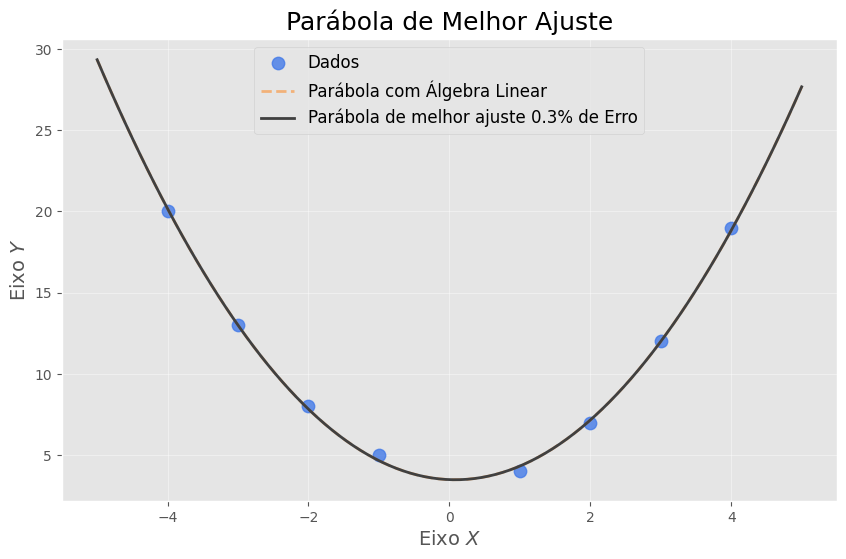

In [16]:
import numpy as np
# Criando pontos para plotar a parábola e Figura
fig, ax = plt.subplots(figsize=(10,6))
x_plot = np.linspace(-5, 5, 100)
y_plot = w1*x_plot**2 + w2*x_plot + b

# Cria pontos para plotar a parábola | Álg. Linear
x_real = np.linspace(-5, 5, 100)
y_real = x_real**2 - 0.166666*x_real + 3.5

# Plota os pontos de treinamento e a parábola
ax.scatter(X, Y, color='#437ae8', label='Dados', linewidth=1, alpha=0.8, s=80)
ax.plot(x_plot, y_real, '--', color='#ff7f0e', label='Parábola com Álgebra Linear', linewidth=2, alpha=0.5)
ax.plot(x_plot, y_plot, '-', color='#404040', label=f'Parábola de melhor ajuste {erro:.1f}% de Erro', linewidth=2, alpha=1)

# Título e os rótulos dos eixos
ax.set_title('Parábola de Melhor Ajuste', fontsize=18)
ax.set_xlabel('Eixo $X$', fontsize=14)
ax.set_ylabel('Eixo $Y$', fontsize=14)

# Toques Finais
ax.legend(loc='upper center', fontsize=12)
ax.grid(True, alpha=0.4)
plt.show()

<div class="markdown-google-sans">

### **Extra:** Análise do Algoritmo
</div>

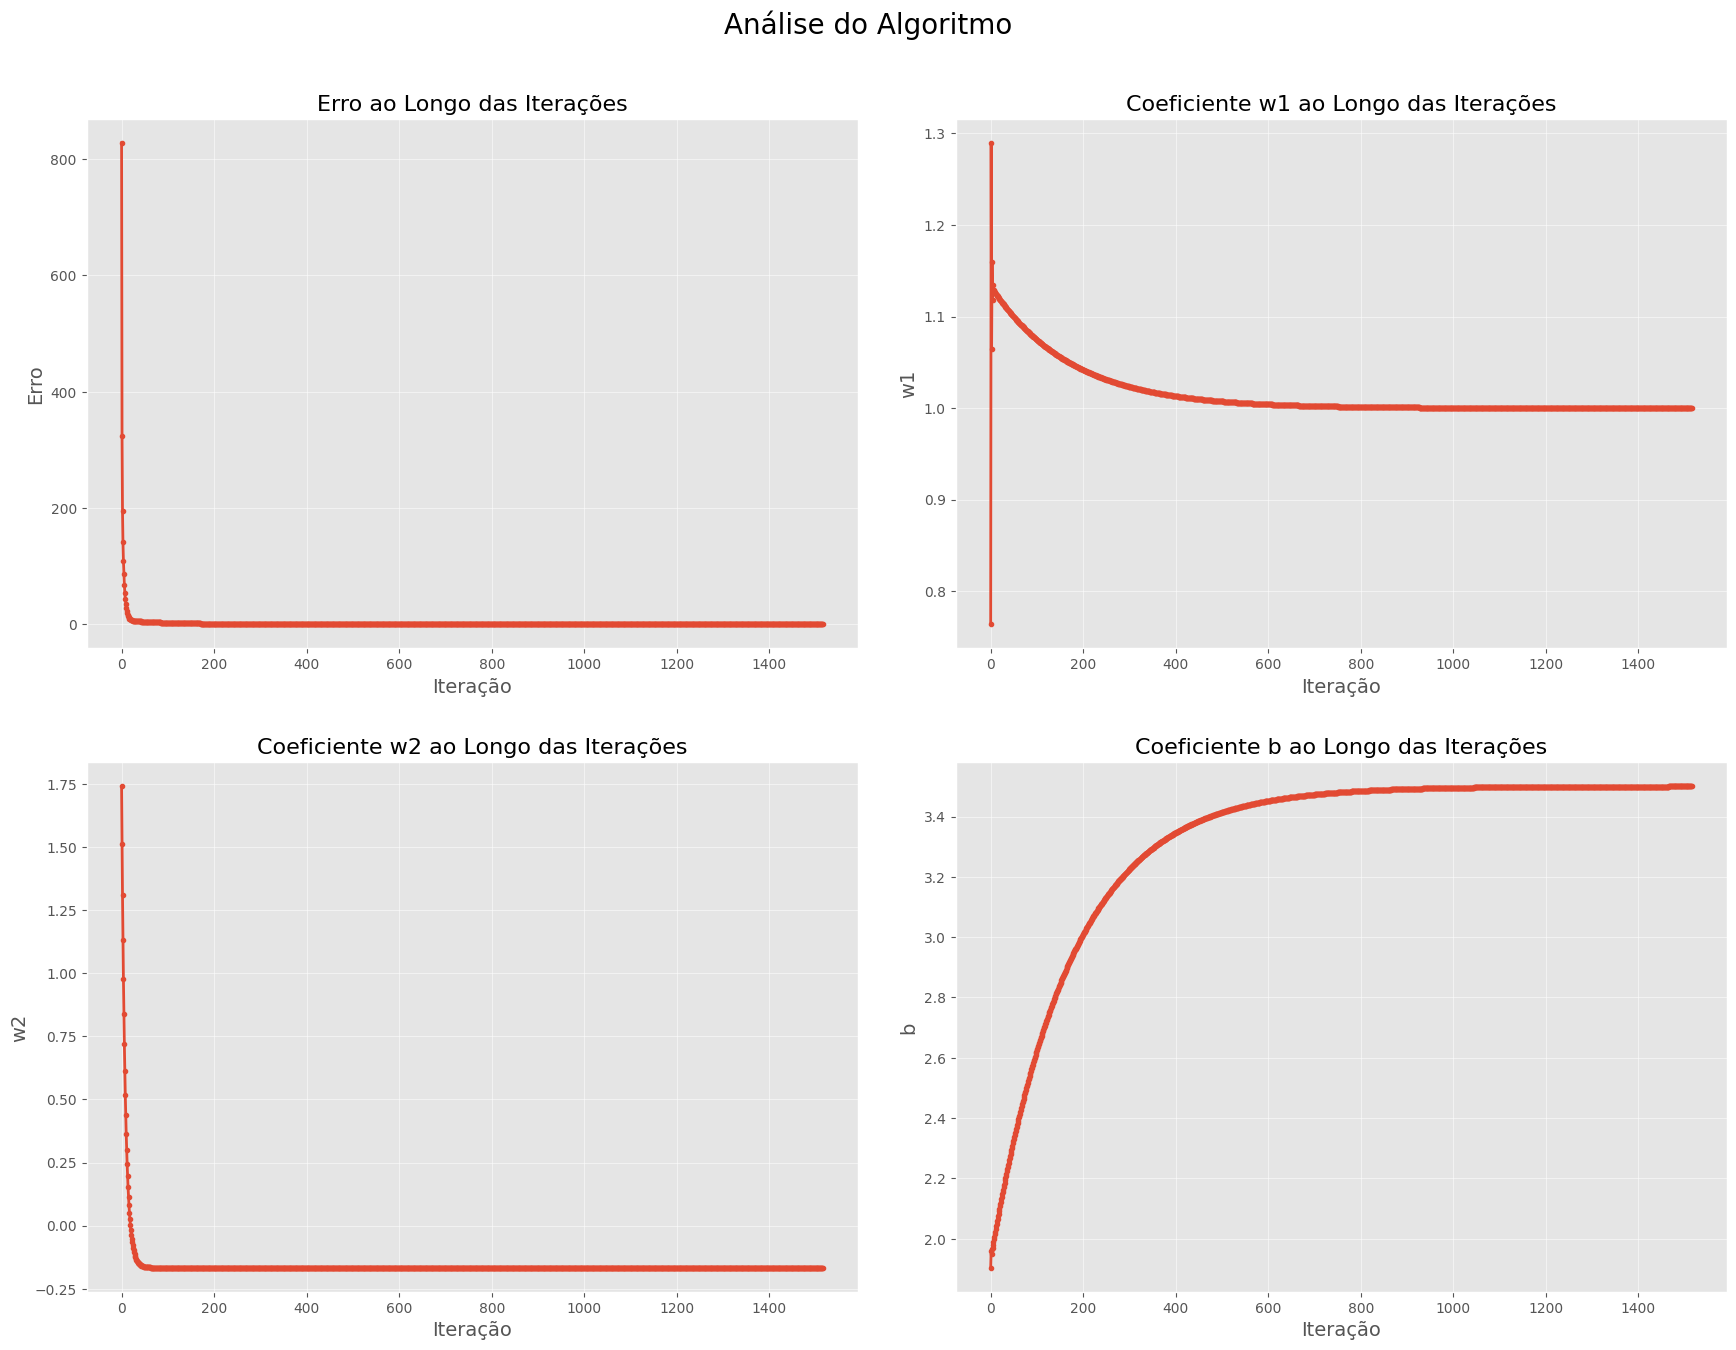

In [17]:
# Gráfico de erro e dos coeficientes ao longo das iterações
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
fig.suptitle(f'Análise do Algoritmo', fontsize=20)

axs[0, 0].plot(erro_list, marker='o', markersize=3, linestyle='-', linewidth=2)
axs[0, 0].set_title('Erro ao Longo das Iterações', fontsize=16)
axs[0, 0].set_xlabel('Iteração', fontsize=14)
axs[0, 0].set_ylabel('Erro', fontsize=14)
axs[0, 0].grid(True, alpha=0.5)

axs[0, 1].plot(w1_list, marker='o', markersize=3, linestyle='-', linewidth=2)
axs[0, 1].set_title('Coeficiente w1 ao Longo das Iterações', fontsize=16)
axs[0, 1].set_xlabel('Iteração', fontsize=14)
axs[0, 1].set_ylabel('w1', fontsize=14)
axs[0, 1].grid(True, alpha=0.5)

axs[1, 0].plot(w2_list, marker='o', markersize=3, linestyle='-', linewidth=2)
axs[1, 0].set_title('Coeficiente w2 ao Longo das Iterações', fontsize=16)
axs[1, 0].set_xlabel('Iteração', fontsize=14)
axs[1, 0].set_ylabel('w2', fontsize=14)
axs[1, 0].grid(True, alpha=0.5)

axs[1, 1].plot(b_list, marker='o', markersize=3, linestyle='-', linewidth=2)
axs[1, 1].set_title('Coeficiente b ao Longo das Iterações', fontsize=16)
axs[1, 1].set_xlabel('Iteração', fontsize=14)
axs[1, 1].set_ylabel('b', fontsize=14)
axs[1, 1].grid(True, alpha=0.5)

plt.tight_layout(pad=3.0)
plt.show()